In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import parse_stats, get_stat_dfs, trim_column_names, merge, REAL_POLICIES, REAL_LABELS, MODEL_LABELS
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [2]:
real_path = "../../results/faro/mixed/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented/latency_stats.pkl"

In [3]:
real_df = parse_stats(real_path)

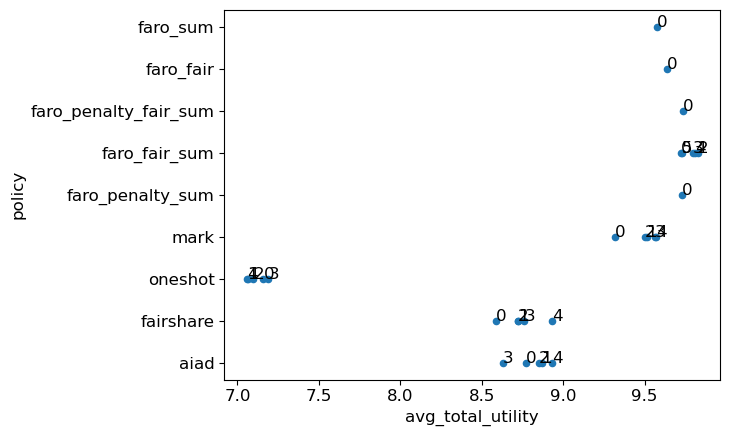

In [4]:
ax = real_df.plot.scatter(x="avg_total_utility", y="policy")
for i, point in real_df.iterrows():
    ax.annotate(point["poisson"], (point["avg_total_utility"], point["policy"]))

In [5]:
# M/D/c COBLYA normal (final, compact, real)

real_policies = [
    "fairshare",
    "oneshot",
    "aiad",
    "mark",
    "faro_fair_sum",
]
labels = [
    "FairShare",
    "Oneshot",
    "AIAD",
    "MArk/Cocktail/Barista",
    "Faro-FairSum",
]
assert len(real_policies) == len(labels)
real_labels = {
    policy: label for policy, label in zip(real_policies, labels)
}
model_labels = {}

In [6]:
num_cpus = 36

# clear ws for simulation to make the same labels
# sim_df.ws = ""

real_cluster_util_df, real_cluster_slo_df, real_cluster_effective_util_df, real_avg_util_df, real_slo_rates_df, real_avg_effective_util_df = get_stat_dfs(real_df[real_df.num_cpus == str(num_cpus)], real_policies, real_labels, model_labels)
# sim_cluster_util_df, sim_cluster_slo_df, sim_cluster_effective_util_df, sim_avg_util_df, sim_slo_rates_df, sim_avg_effective_util_df = get_stat_dfs(sim_df[sim_df.num_cpus == str(num_cpus)], sim_policies, sim_labels, model_labels)

cluster_utils
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-FairSum 5
cluster_effective_utils
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-FairSum 5
cluster_slo
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-FairSum 5
avg_utils
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-FairSum 10
slo_rates
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-FairSum 10
avg_effective_utils
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-FairSum 10


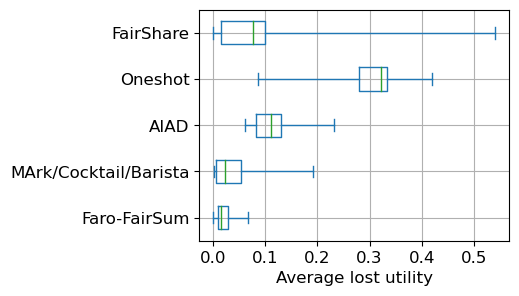

In [7]:
# boxplot_figsize = (6, 4)
boxplot_figsize = (4, 3)

ax = (1 - real_avg_util_df).plot.box(rot=0, vert=False, grid=True, whis=(0, 100), figsize=boxplot_figsize)
ax.invert_yaxis()
# if num_cpus in [32, 36] and "fairshare" not in real_policies:
    # ax.set_xlim(None, 0.85)
ax.set_xlabel("Average lost utility")
ax.get_figure().savefig(f"images/mixed_{num_cpus}_box_avg_lost_utility_real.eps", bbox_inches='tight')

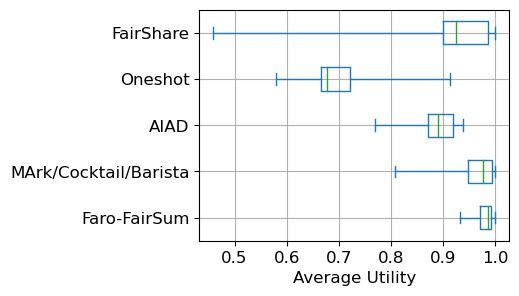

In [8]:
ax = real_avg_util_df.plot.box(rot=0, vert=False, grid=True, whis=(0, 100), figsize=boxplot_figsize)
ax.invert_yaxis()
ax.set_xlabel("Average Utility")
ax.get_figure().savefig(f"images/mixed_{num_cpus}_box_avg_utility_real.eps", bbox_inches='tight')

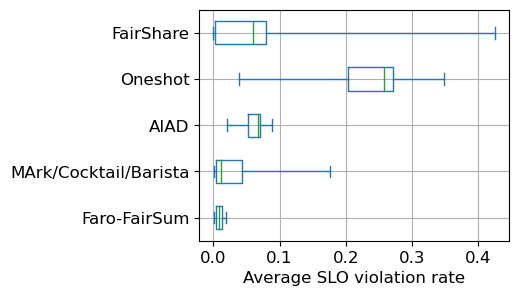

In [9]:
ax = real_slo_rates_df.plot.box(rot=0, vert=False, grid=True, whis=(0, 100), figsize=boxplot_figsize)
ax.invert_yaxis()
ax.set_xlabel("Average SLO violation rate")
ax.get_figure().savefig(f"images/mixed_{num_cpus}_box_slo_violation_real.eps", bbox_inches='tight')

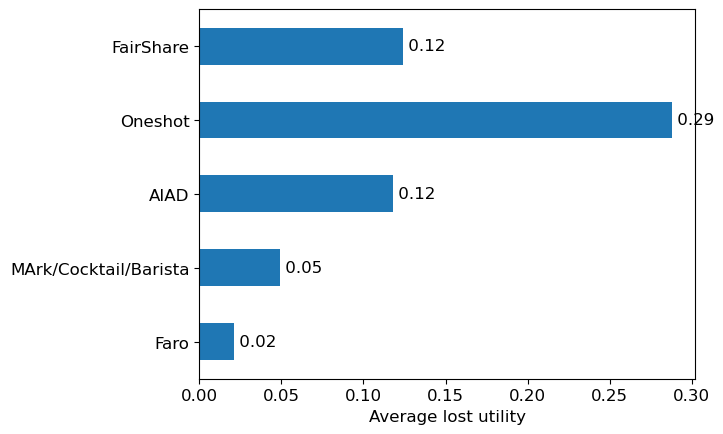

In [10]:
targets = ["FairShare", "Oneshot", "AIAD", "MArk/Cocktail/Barista", "Faro-FairSum"]

ax = (1 - real_avg_util_df.mean())[targets].plot.barh()
# ax = (1 - real_avg_util_df.mean()).plot.barh()
ax.set_xlabel("Average lost utility")

new_labels = []
for text in ax.get_yticklabels():
    splits = text.get_text().split("-")
    text.set_text(splits[0])
    new_labels.append(text)
ax.set_yticklabels(new_labels)

ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")
if num_cpus == 32:
    ax.set_xlim(None, 0.5)
# elif num_cpus == 36:
    # ax.set_xlim(None, 0.4)
elif num_cpus == 16:
    ax.set_xlim(None, 1.0)
ax.get_figure().savefig(f"images/mixed_{num_cpus}_avg_lost_utility_real.eps", bbox_inches='tight')

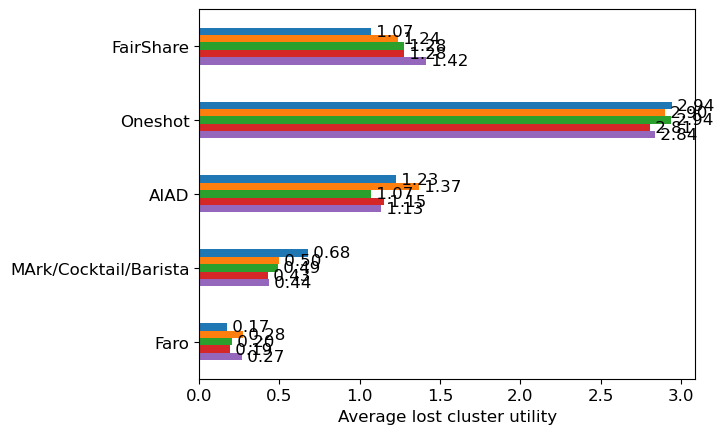

In [11]:
ax = (10 - real_cluster_util_df)[targets].transpose().plot.barh(legend=False)
# # ax = (1 - real_avg_util_df.mean()).plot.barh()
ax.set_xlabel("Average lost cluster utility")

new_labels = []
for text in ax.get_yticklabels():
    splits = text.get_text().split("-")
    text.set_text(splits[0])
    new_labels.append(text)
ax.set_yticklabels(new_labels)

ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")
if num_cpus == 32:
    ax.set_xlim(None, 5.5)
# elif num_cpus == 36:
#     ax.set_xlim(None, 0.4)
elif num_cpus == 16:
    ax.set_xlim(None, 10)
ax.get_figure().savefig(f"images/mixed_{num_cpus}_avg_lost_cluster_utility_real.eps", bbox_inches='tight')

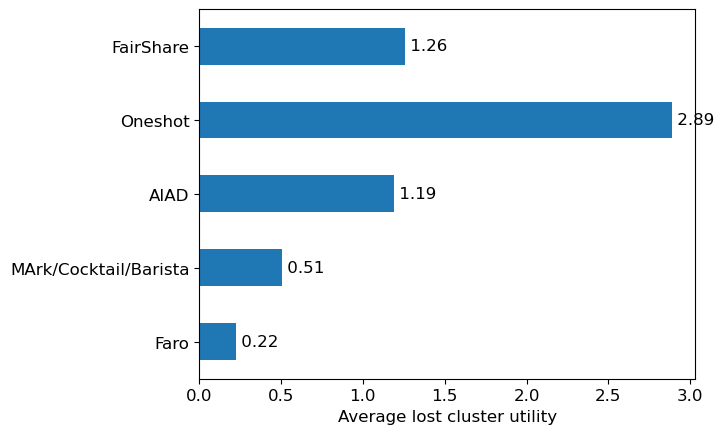

In [12]:
ax = (10 - real_cluster_util_df)[targets].mean(axis=0).plot.barh(legend=False)
# # ax = (1 - real_avg_util_df.mean()).plot.barh()
ax.set_xlabel("Average lost cluster utility")

new_labels = []
for text in ax.get_yticklabels():
    splits = text.get_text().split("-")
    text.set_text(splits[0])
    new_labels.append(text)
ax.set_yticklabels(new_labels)

ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")
if num_cpus == 32:
    ax.set_xlim(None, 5.5)
# elif num_cpus == 36:
#     ax.set_xlim(None, 0.4)
elif num_cpus == 16:
    ax.set_xlim(None, 10)
ax.get_figure().savefig(f"images/mixed_{num_cpus}_avg_lost_cluster_utility_real.eps", bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


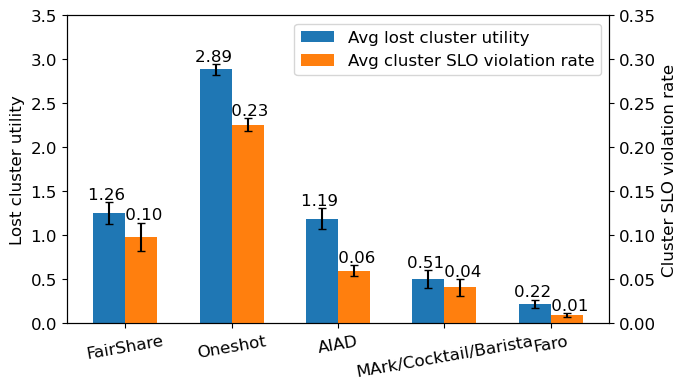

In [13]:
# figsize=(7.4, 4.8)
# figsize=(8.4, 4.8)
figsize=(7, 4)

# ax = pd.concat([
#     (10 - real_cluster_util_df)[targets].transpose().rename(columns={0: "Avg lost cluster utility"}),
#     (1 - real_cluster_slo_df)[targets].transpose().rename(columns={0: "Avg cluster SLO violation rate"}),
# ], axis=1).plot.bar(secondary_y="Avg cluster SLO violation rate", mark_right=False, figsize=figsize, width=0.6)

lost_real_cluster_util_df = 10 - real_cluster_util_df
lost_real_cluster_slo_df = 1 - real_cluster_slo_df
merged_df = pd.concat([
    lost_real_cluster_util_df[targets].mean(axis=0),
    lost_real_cluster_slo_df[targets].mean(axis=0),
], axis=1).rename(columns={0: "Avg lost cluster utility", 1: "Avg cluster SLO violation rate"})
merged_std_df = pd.concat([
    lost_real_cluster_util_df[targets].std(axis=0),
    lost_real_cluster_slo_df[targets].std(axis=0),
], axis=1).rename(columns={0: "Avg lost cluster utility", 1: "Avg cluster SLO violation rate"})
ax = merged_df.plot.bar(secondary_y="Avg cluster SLO violation rate", mark_right=False, figsize=figsize, width=0.6, yerr=merged_std_df, capsize=3)

if num_cpus in [32, 36]:
    ax.set_ylim(top=3.5)
elif num_cpus == 16:
    ax.set_ylim(top=10)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Lost cluster utility")

new_labels = []
for text in ax.get_xticklabels():
    splits = text.get_text().split("-")
    text.set_text(splits[0])
    new_labels.append(text)
ax.set_xticklabels(new_labels, rotation=0)

right_ax = ax.right_ax
if num_cpus in [32, 36]:
    right_ax.set_ylim(top=0.35)
elif num_cpus == 16:
    right_ax.set_ylim(top=1.0)
right_ax.set_ylabel("Cluster SLO violation rate")

for bar in ax.containers:
    if isinstance(bar, matplotlib.container.BarContainer):
        ax.bar_label(bar, fmt="%.2f ")

for bar in right_ax.containers:
    if isinstance(bar, matplotlib.container.BarContainer):
        right_ax.bar_label(bar, fmt=" %.2f")

ax.set_xticklabels(ax.get_xticklabels(), rotation=10)

ax.get_figure().savefig(f"images/mixed_{num_cpus}_avg_lost_cluster_utility_slo_real.eps", bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

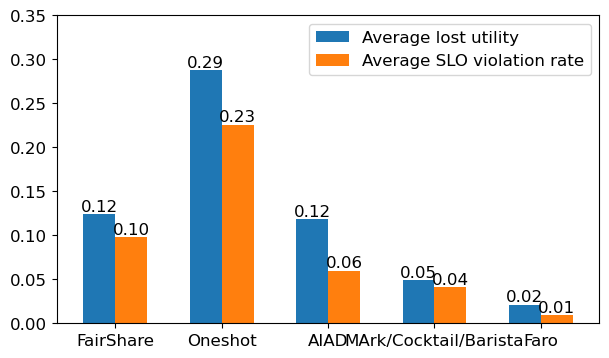

In [14]:
fig = plt.figure()
merged_df = merge((1-real_avg_util_df.mean()), (real_slo_rates_df).mean())
merged_df.rename(columns={"Cluster": "Average lost utility", "Simulation": "Average SLO violation rate"}, inplace=True)
ax = merged_df.loc[targets].plot.bar(figsize=figsize, width=0.6)
# plt.ylabel("Average lost utility / SLO violation rate")
plt.xticks(rotation=0)

new_labels = []
for text in ax.get_xticklabels():
    splits = text.get_text().split("-")
    text.set_text(splits[0])
    new_labels.append(text)
ax.set_xticklabels(new_labels)

# ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.2f")
if num_cpus in [32, 36]:
    ax.set_ylim(None, 0.35)
elif num_cpus == 16:
    ax.set_ylim(None, 1.0)
ax.get_figure().savefig(f"images/mixed_{num_cpus}_avg_lost_utility_slo_real.eps", bbox_inches='tight')